In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('tweets_netflix.csv')

In [4]:
df.head()

,Tweet,Keywords,Date,User,Source,Tweet_Id,Tweet_URL
0,NETFLIX ANTI ON HOLD NYA READY LOH DIJAMIN FAS...,Netflix,2020-07-05 14:02:38,peachywinz,Twitter for iPhone,1279777713541115909,https://twitter.com/statuses/1279777713541115909
1,"""There is a road, no simple highway,\nBetween ...",Netflix,2020-07-05 14:02:39,capleonardi_zed,Twitter for Android,1279777718893187072,https://twitter.com/statuses/1279777718893187072
2,"""I passionately dream of seeing girls like me ...",Netflix,2020-07-05 14:02:40,Lattif,Twitter Web App,1279777722508685312,https://twitter.com/statuses/1279777722508685312
3,This is so 😱\n\n#28WeeksLater\n#Netflix https:...,"#Netflix, Netflix",2020-07-05 14:02:45,TickleMe_Pink24,Twitter for Android,1279777743467511809,https://twitter.com/statuses/1279777743467511809
4,"Fuxk Firstbank, can’t pay for Apple Music, can...",Netflix,2020-07-05 14:02:46,Keribaby106,Twitter for iPhone,1279777746848296961,https://twitter.com/statuses/1279777746848296961


In [7]:
tweet = pd.DataFrame(df['Tweet'])

In [8]:
tweet.head()

,Tweet
0,NETFLIX ANTI ON HOLD NYA READY LOH DIJAMIN FAS...
1,"""There is a road, no simple highway,\nBetween ..."
2,"""I passionately dream of seeing girls like me ..."
3,This is so 😱\n\n#28WeeksLater\n#Netflix https:...
4,"Fuxk Firstbank, can’t pay for Apple Music, can..."


In [9]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
    return text


# Clean the tweets
tweet['Tweet'] = tweet['Tweet'].apply(cleanTxt)

# Show the cleaned tweets
tweet

,Tweet
0,NETFLIX ANTI ON HOLD NYA READY LOH DIJAMIN FAS...
1,"""There is a road, no simple highway,\nBetween ..."
2,"""I passionately dream of seeing girls like me ..."
3,This is so 😱\n\n28WeeksLater\nNetflix
4,"Fuxk Firstbank, can’t pay for Apple Music, can..."
...,...
1056,Wonho's netflix recommendation: \n\nModern fam...
1057,Today is a Netflix and chill day.
1058,hi this reboot is better than expected. Is th...
1059,OML I SPENT ONE HOUR BROWSING TO HALF OF THE ...


In [ ]:
tweet.to_csv()

In [10]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
tweet['Subjectivity'] = tweet['Tweet'].apply(getSubjectivity)
tweet['Polarity'] = tweet['Tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
tweet

,Tweet,Subjectivity,Polarity
0,NETFLIX ANTI ON HOLD NYA READY LOH DIJAMIN FAS...,0.500000,0.100000
1,"""There is a road, no simple highway,\nBetween ...",0.389286,-0.125000
2,"""I passionately dream of seeing girls like me ...",0.575000,0.100000
3,This is so 😱\n\n28WeeksLater\nNetflix,0.000000,0.000000
4,"Fuxk Firstbank, can’t pay for Apple Music, can...",0.000000,0.000000
...,...,...,...
1056,Wonho's netflix recommendation: \n\nModern fam...,0.366667,0.016667
1057,Today is a Netflix and chill day.,0.000000,0.000000
1058,hi this reboot is better than expected. Is th...,0.450000,0.200000
1059,OML I SPENT ONE HOUR BROWSING TO HALF OF THE ...,0.133333,-0.133333


In [29]:
tweet.Tweet[27]

'a walk to remember is on netflix i could cry'

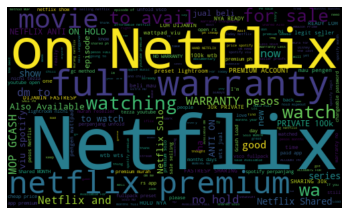

In [33]:
allWords = ' '.join([twts for twts in tweet['Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [40]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

tweet['Analysis'] = tweet['Polarity'].apply(getAnalysis)
# Show the dataframe
tweet

,Tweet,Subjectivity,Polarity,Analysis
0,NETFLIX ANTI ON HOLD NYA READY LOH DIJAMIN FAS...,0.500000,0.100000,Positive
1,"""There is a road, no simple highway,\nBetween ...",0.389286,-0.125000,Negative
2,"""I passionately dream of seeing girls like me ...",0.575000,0.100000,Positive
3,This is so 😱\n\n28WeeksLater\nNetflix,0.000000,0.000000,Neutral
4,"Fuxk Firstbank, can’t pay for Apple Music, can...",0.000000,0.000000,Neutral
...,...,...,...,...
1056,Wonho's netflix recommendation: \n\nModern fam...,0.366667,0.016667,Positive
1057,Today is a Netflix and chill day.,0.000000,0.000000,Neutral
1058,hi this reboot is better than expected. Is th...,0.450000,0.200000,Positive
1059,OML I SPENT ONE HOUR BROWSING TO HALF OF THE ...,0.133333,-0.133333,Negative
